# Step 1: Import Libraries

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset


In [136]:
df = pd.read_csv('drugs_side_effects_drugs_com.csv')


# Display the first few rows of the dataset

In [137]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


# Step 3: Data Cleaning

Check for missing values:

In [138]:
df.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

# Handle missing values
Drop or fill missing values depending on the context.


In [139]:
# Example: Drop rows with missing values
df_cleaned = df.dropna()

In [140]:
# Or fill missing values with a placeholder
df_filled = df.fillna('Unknown')

# Step 4: Basic Data Exploration

In [141]:
# Summary statistics
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


#Distribution of Ratings:

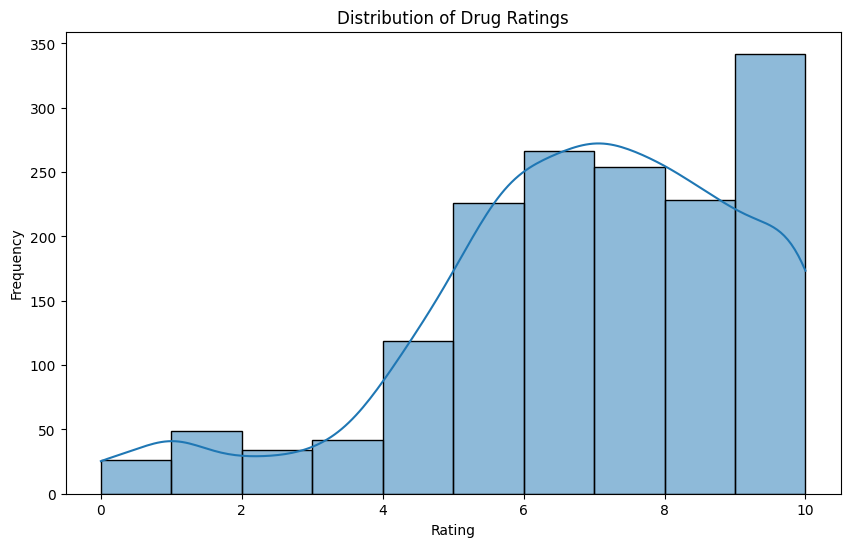

In [142]:
# Distribution of drug ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Step 5: Analyzing Relationships

i)  Top Drugs by Condition:


In [143]:
# Count the most common drugs for each medical condition
top_drugs =df.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(top_drugs)

medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


ii) Side Effects Analysis:


In [144]:
# Analyzing the most common side effects
side_effects = df['side_effects'].value_counts().head(10)
print(side_effects)

side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                           10
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less serious side effects may be more

iii) Drug Ratings by Class:


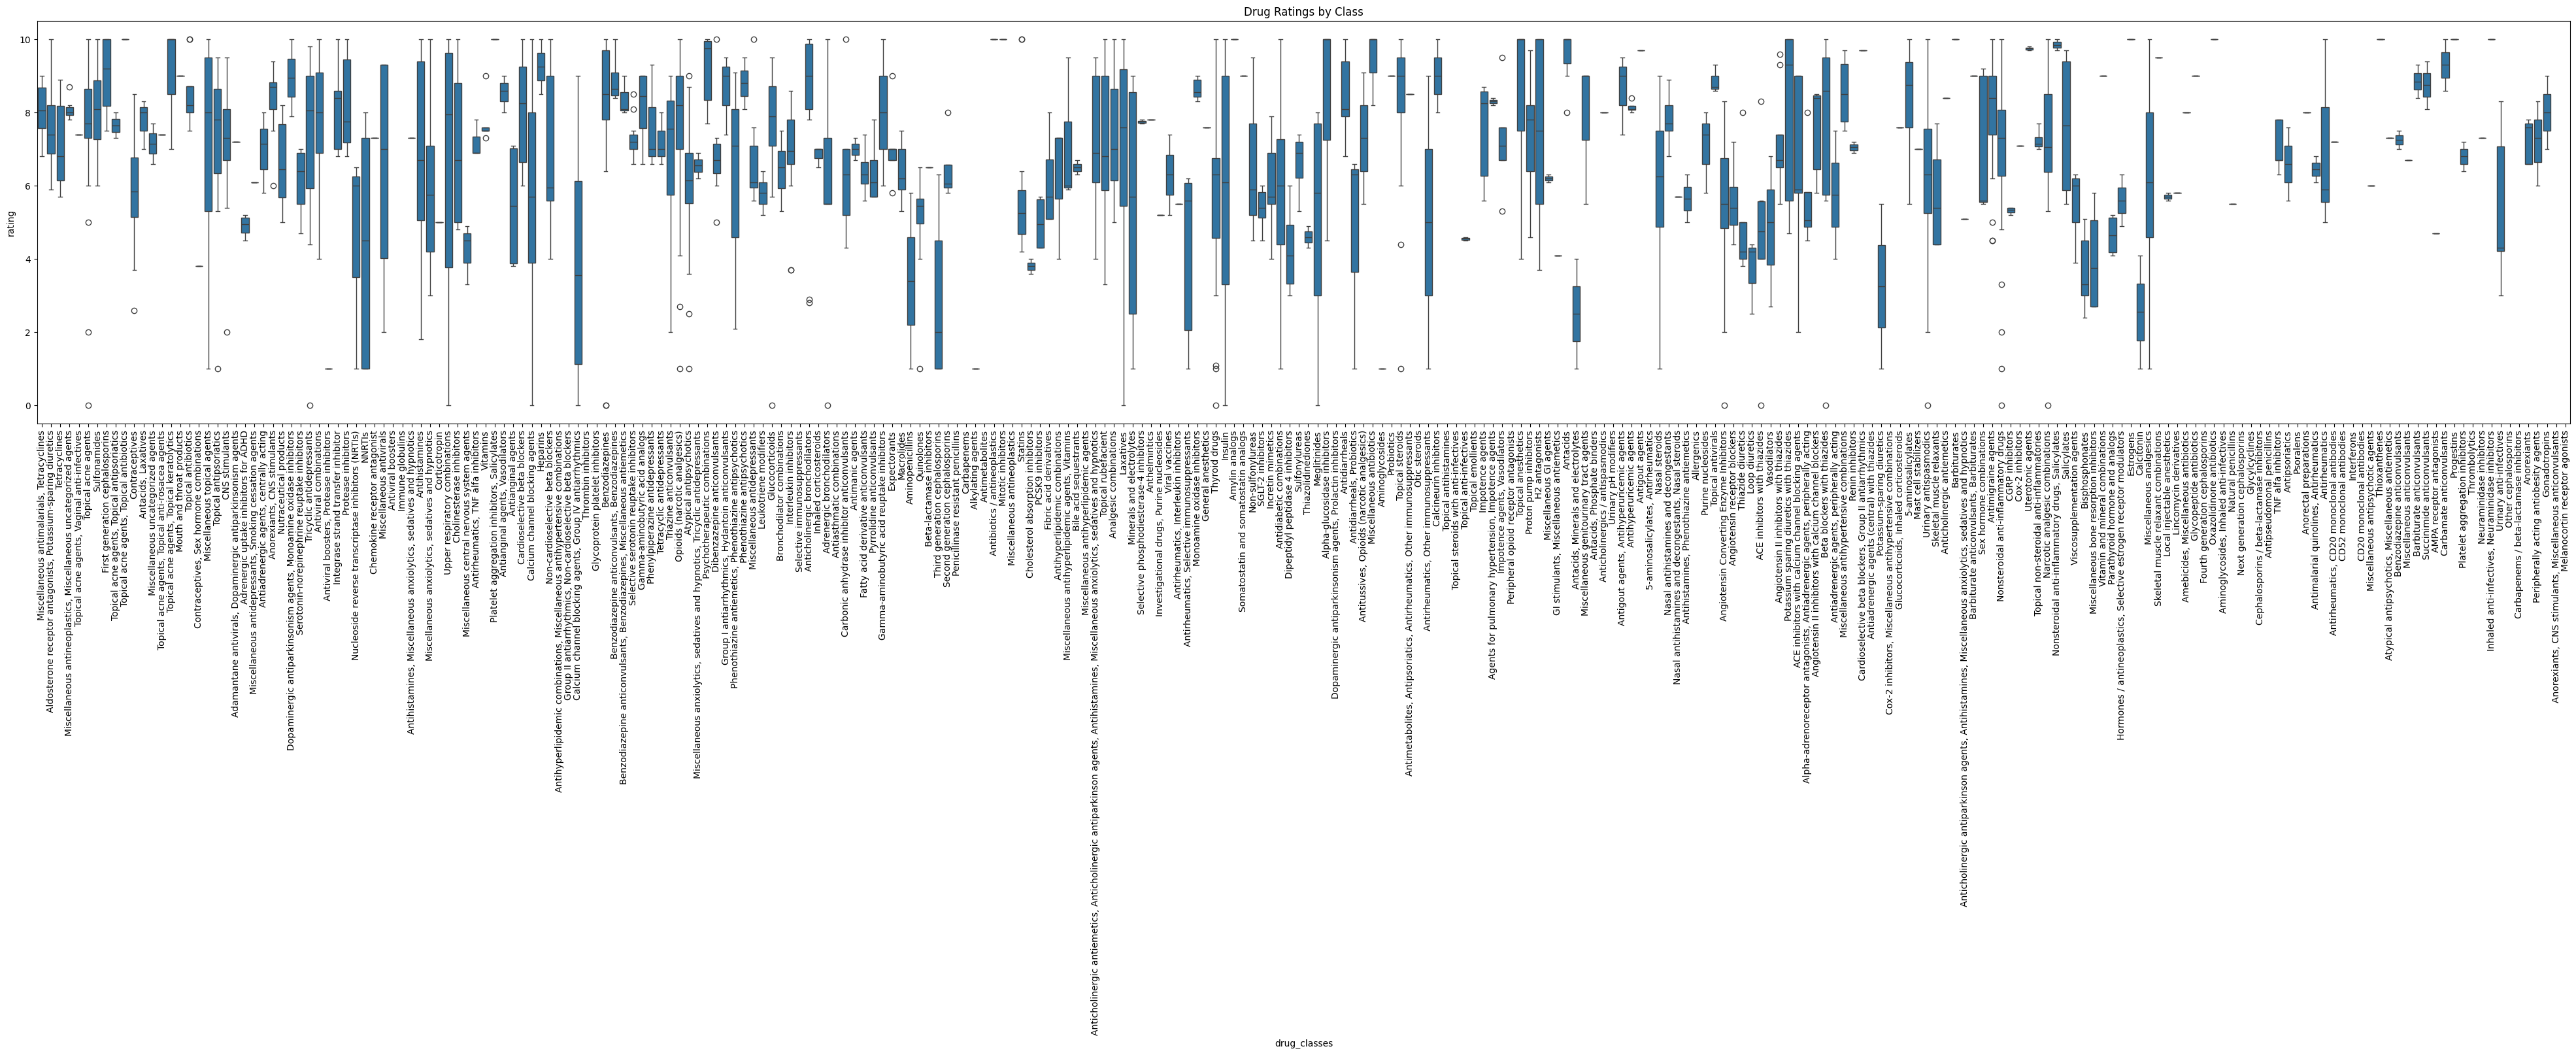

In [145]:
# Boxplot of ratings by drug class
plt.figure(figsize=(50, 8))
sns.boxplot(x='drug_classes', y='rating', data=df)
plt.xticks(rotation=90)
plt.title('Drug Ratings by Class')
plt.show()

# Step 6: Conclusion

Summarize findings:

○ Identify any trends or patterns in the data.

○ Discuss how certain drug classes or conditions are associated with specific side effects or ratings.

# Next Steps
Advanced Analysis:Perform more sophisticated statistical tests or machine learning techniques.

● Reporting: Create a report or presentation to share the findings.


# Example Output
Distribution of Drug Ratings:

○ A histogram showing how drug ratings are distributed, with peaks at certain rating values.

Top Drugs for a Condition:

○ A list or bar chart showing the most commonly prescribed drugs for a particular condition.

Side Effects Analysis:

○ A list of the most common side effects reported in the dataset.


# Code with output

#Import dataset

In [146]:
import pandas as pd
import numpy as np

#Read the CSV file into a DataFrame

In [147]:
fpath ='D:\VSCode\projects\Drugs, Side Effects and Medical Condition\drugs_side_effects_drugs_com.csv'
df = pd.read_csv(fpath)


In [148]:
data = pd.read_csv(fpath)

#Display the columns quantity and names

In [149]:
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
print("column:")
print(data.columns)


The dataset has 2931 rows and 17 columns
column:
Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')


In [150]:
# Show the main information about dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [151]:
data.head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [152]:
# Dropping the 'brand_names' column and delete from dataset
data.drop(columns=['brand_names'], inplace=True)

In [153]:
# Find duplicate rows based on all columns
duplicate_rows= data[data.duplicated()]


In [154]:
#Count the duplicated rows
duplicate_count = duplicate_rows.shape[0]

In [155]:
# Print the count of duplicate rows
print("Count of Duplicate Rows:", duplicate_count)
print(duplicate_rows) # Print the duplicate rows


Count of Duplicate Rows: 0
Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url]
Index: []


In [156]:
# Convert 'rating' and 'no_of_reviews' attributes to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'], errors='coerce')
print(data.dtypes.value_counts())

object     14
float64     2
Name: count, dtype: int64


In [157]:
# Convert 'activity' to string, remove whitespace and '%'character, then convert to float and divide by 10
data['activity'] = data['activity'].astype(str).str.replace(r'\s+', '', regex=True).str.rstrip('%').astype('float')/100

In [158]:
# Display the updated 'activity' column
print(data['activity'].head())

0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64


In [159]:
# Print the total number of missing values
print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))


There are 6192 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 124
	generic_name: 43
	drug_classes: 82
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 1554
	related_drugs: 1469
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


In [160]:
# In the alcohol column we have X and null(NaN) values, because the drug can interact with alcohol or not.
# Therefore, let's replace the values of ak=lcohol column with boolean values.


In [161]:
# Let X will be 1 of interaction, NaN will be 0.
data['alcohol']=data['alcohol'].replace(np.nan,'0')
data['alcohol']=data['alcohol'].replace({'X': 1})


In [162]:
# To avoid missing values let's fill them with some information
# In our case we will replace all them
# Fill the null values in 'side_effects' and 'related_drugs'with no
data["side_effects"] = data['side_effects'].fillna('Unknown')
data["related_drugs"] = data['related_drugs'].fillna('Unknown')


In [163]:
# Fill the null values with 0 as a base for 'rating' and 'no_of_reviews' columns
# It will show that there are no information about it
data["rating"] = data['rating'].fillna('0')
data["no_of_reviews"] = data['no_of_reviews'].fillna('0')

In [164]:
# Fill the null values with ?
data['generic_name']=data['generic_name'].replace(np.nan,'Unknown')


In [165]:
# Fill the null values with undefined for 'drug_classes'
data['drug_classes']=data['drug_classes'].replace(np.nan,'Unknown')


#For these two columns we already have some category values from dataset's description

#So, let's check the categorical values

In [166]:
# For Rx_OTC
data["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [167]:
# For pregnancy categories
data["pregnancy_category"].unique()


array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [168]:
# Fill the null value with Unknown as a basic value
data['rx_otc']=data['rx_otc'].replace(np.nan, 'Unknown')


In [169]:
# Fill the null value with Unknown as a basic value
data['pregnancy_category']=data['pregnancy_category'].replace(np.nan, 'Unknown')
data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'],errors='coerce')
print(data.head())


        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [170]:
# Let's check is there any missing values left
print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

There are 0 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 0
	pregnancy_category: 0
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 0
	no_of_reviews: 0
	drug_link: 0
	medical_condition_url: 0


In [171]:
data_version2=data.copy()
print(data_version2.head())           # Print head of dataset to our check

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [172]:
# Read the new version dataset
data_ver3=pd.read_csv('drugs_side_effects_drugs_com_version2.csv')

In [173]:
data_ver3["pregnancy_category"].unique()


array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [174]:
data_ver3["csa"].unique()


array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [175]:
data_ver3["rx_otc"].unique()


array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [176]:
data_ver3["generic_name"].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ...,
       'fenfluramine', 'phendimetrazine tartrate', 'setmelanotide'],
      shape=(1393,), dtype=object)

In [177]:
data_ver3["medical_condition"].unique()


array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
label_encoder = LabelEncoder()

In [180]:
data_ver3["csa"]=label_encoder.fit_transform(data_ver3["csa"])
data_ver3["rx_otc"]=label_encoder.fit_transform(data_ver3["rx_otc"])


In [181]:
data_ver3["generic_name"] = label_encoder.fit_transform(data_ver3["generic_name"])
data_ver3["medical_condition"] = label_encoder.fit_transform(data_ver3["medical_condition"])
data_ver3["pregnancy_category"] = label_encoder.fit_transform(data_ver3["pregnancy_category"])
data_ver3["side_effects"] = label_encoder.fit_transform(data_ver3["side_effects"])


In [182]:
data_ver3["generic_name"].unique()


array([ 641, 1269, 1033, ...,  728, 1156, 1258], shape=(1393,))

In [183]:
data_ver3["rx_otc"].unique()

array([1, 2, 0, 3])

In [184]:
data_ver3["csa"].unique()


array([5, 0, 2, 6, 4, 3, 1])

In [185]:
data_ver3["side_effects"].unique()


array([  15, 1971, 2696, ..., 1646,  416, 1705], shape=(2760,))

In [186]:
data_ver3["medical_condition"].unique()

array([ 2,  0,  1,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 10, 15, 16,
       17, 18, 19, 20, 21, 23, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [187]:
df=pd.DataFrame(data_ver3,columns=('generic_name','medical_condition', 'no_of_reviews', 'side_effects', 'rating','csa', 'pregnancy_category', 'rx_otc', 'alcohol'))
df.head(10)

,generic_name,medical_condition,no_of_reviews,side_effects,rating,csa,pregnancy_category,rx_otc,alcohol
0,641,2,760.0,15,6.8,5,3,1,X
1,1269,2,449.0,1971,7.2,5,2,1,X
2,1033,2,482.0,2696,5.7,5,3,1,NaN
3,902,2,623.0,2569,7.9,5,5,1,X
4,504,2,146.0,1259,7.4,5,1,1,NaN
5,1269,2,8.0,1970,7.6,5,2,1,X
6,1334,2,439.0,1894,7.7,5,2,1,NaN
7,902,2,999.0,2576,8.0,5,5,1,X
8,1275,2,96.0,2701,8.5,5,3,1,X
9,162,2,86.0,2404,7.9,5,2,1,NaN


In [188]:
from sklearn.preprocessing import StandardScaler


In [190]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# If needed, turn back into DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

print(scaled_df)


      generic_name  medical_condition  no_of_reviews  side_effects    rating  \
0        -0.155499          -1.434004       3.705505     -1.734343 -0.005590   
1         1.439615          -1.434004       2.022992      0.637223  0.167397   
2         0.840177          -1.434004       2.201523      1.516254 -0.481304   
3         0.507439          -1.434004       2.964334      1.362272  0.470124   
4        -0.503478          -1.434004       0.383759     -0.226046  0.253890   
...            ...                ...            ...           ...       ...   
2926     -0.869237           1.829189      -0.314132      0.616611  0.297137   
2927      0.065480           1.829189            NaN      0.243174       NaN   
2928      1.152596           1.829189            NaN      1.592639       NaN   
2929      1.411676           1.829189            NaN     -1.248148       NaN   
2930      1.411676           1.829189            NaN      0.314709       NaN   

           csa  pregnancy_category    r

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

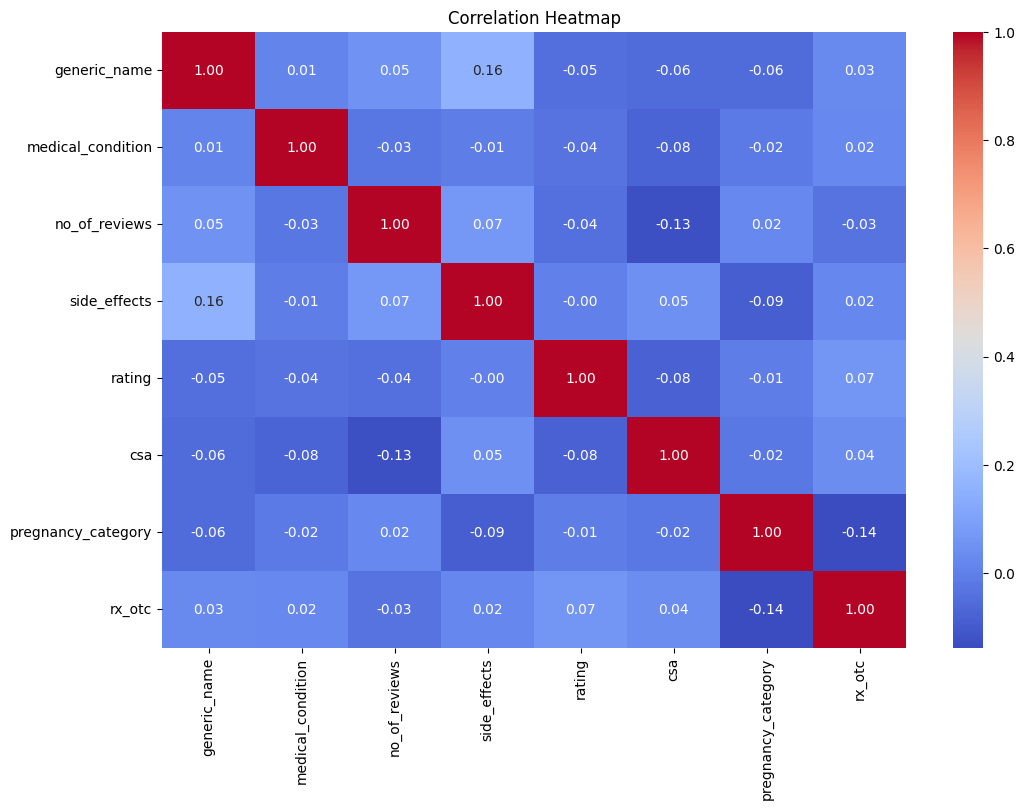

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [195]:
# Read the new version dataset
data_ver4 = pd.read_csv('drugs_side_effects_drugs_com_version2.csv')

In [197]:
!pip install mlxtend


In [198]:
# Importing necessary libraries
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import pandas as pd

In [201]:
# Check for occurrence and frequency of medical conditions,sorted from highest to lowest 
medical_condition_counts =data_ver4['medical_condition'].value_counts().sort_values(ascending=False)
print("\nMedical condition occurrence and frequency (sorted from highest to lowest):")
print(medical_condition_counts)


Medical condition occurrence and frequency (sorted from highest to lowest):
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Bronchitis               71
Angina                   71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Cholesterol              45
Anxiety                  45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
COPD                     23
Weight Lo

In [208]:
# Importing necessary libraries for processing text
from collections import Counter
import re

In [212]:
# Function to extract side effects from text, split by semicolons
def extract_side_effects(text):
    return [effect.strip() for effect in re.split(r'[;]',text)]

In [213]:
# Extract and count occurrences of side effects
side_effects = data_ver4['side_effects'].dropna().apply(extract_side_effects).explode()
side_effect_counts = side_effects.value_counts().sort_values(ascending=False)


In [214]:
print("\nSide effects occurrence and frequency (sorted from highest to lowest):")
print(side_effect_counts)


Side effects occurrence and frequency (sorted from highest to lowest):
side_effects
hives                                                                                                                                                                                                                                                                                                                                      1788
difficult breathing                                                                                                                                                                                                                                                                                                                        1130
difficulty breathing                                                                                                                                                                                                                               

In [217]:
# Function to extract drug classes from text, split by commas
def extract_drug_classes(text):
    return [effect.strip() for effect in re.split(r'[,]',
text)]                    # Split the text on commas then strip whitespace

In [219]:
# Extract and count occurrences of drug classes
drug_classes = data_ver4['drug_classes'].dropna().apply(extract_drug_classes).explode()
drug_classes_counts = drug_classes.value_counts().sort_values(ascending=False)


In [220]:
print("\nDrug Classes occurrence and frequency (sorted from highest to lowest):")
print(drug_classes_counts)



Drug Classes occurrence and frequency (sorted from highest to lowest):
drug_classes
Upper respiratory combinations          245
Topical acne agents                     125
Topical steroids                         94
Antihistamines                           82
Nonsteroidal anti-inflammatory drugs     72
                                       ... 
Antipseudomonal penicillins               1
CD52 monoclonal antibodies                1
Progestins                                1
Interferons                               1
Thioxanthenes                             1
Name: count, Length: 243, dtype: int64


In [222]:
# Safe version of the function
def has_hives(text):
    return isinstance(text, str) and 'hives' in text.lower()

# Apply the function
data_ver4['Hives'] = data_ver4['side_effects'].apply(has_hives)


In [224]:
def has_difficult_breathing(text):
    if isinstance(text, str):
        return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()
    return False

data_ver4['Difficult Breathing'] = data_ver4['side_effects'].apply(has_difficult_breathing)



In [226]:
def has_itching(text):
    if isinstance(text, str):
        return 'itching' in text.lower()
    return False

data_ver4['Itching'] = data_ver4['side_effects'].apply(has_itching)



In [228]:
# Define functions to check for specific drug classes and create new boolean columns
def is_usc(text):
    if isinstance(text, str):
        return 'Upper respiratory combinations' in text
    return False

data_ver4['Upper respiratory combinations'] = data_ver4['drug_classes'].apply(is_usc)


In [230]:
def is_steroids(text):
    if isinstance(text, str):
        return 'Topical steroids' in text
    return False

data_ver4['Topical steroids'] = data_ver4['drug_classes'].apply(is_steroids)



In [233]:
def is_acne(text):
    if isinstance(text, str):
        return 'Topical acne agents' in text
    return False

data_ver4['Topical acne agents'] = data_ver4['drug_classes'].apply(is_acne)


In [234]:
# Define functions to check for specific medical conditions and create new boolean columns

In [235]:
def has_pain(text):
    return 'Pain' in text
data_ver4['Pain'] = data_ver4['medical_condition'].apply(has_pain)

In [236]:
def has_colds_and_flu(text):
    return 'Colds & Flu' in text
data_ver4['Colds & Flu'] = data_ver4['medical_condition'].apply(has_colds_and_flu)

In [238]:
def has_acne(text):
    return 'Acne' in text
data_ver4['Acne'] = data_ver4['medical_condition'].apply(has_acne)

In [239]:
# Plot the count of occurrences for each side effect
import seaborn as sns

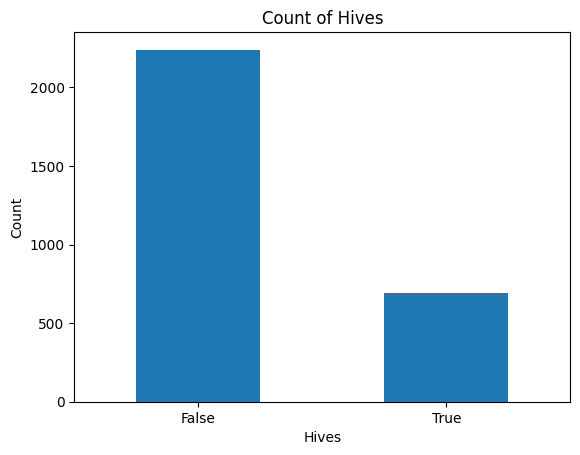

In [240]:
# Plot count of Hives
data_ver4['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

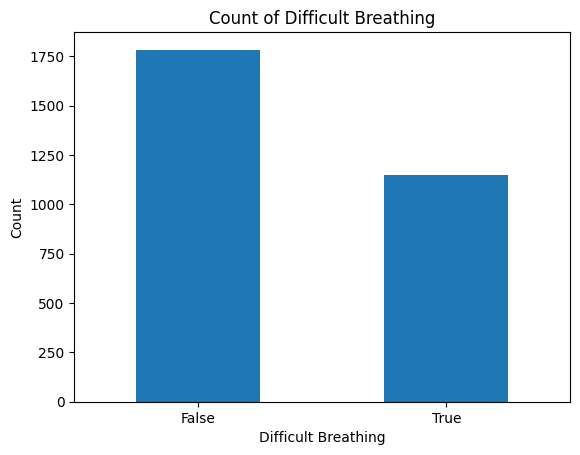

In [241]:
# Plot count of Difficult Breathing
data_ver4['Difficult Breathing'].value_counts().plot(kind='bar')
plt.title('Count of Difficult Breathing')
plt.xlabel('Difficult Breathing')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

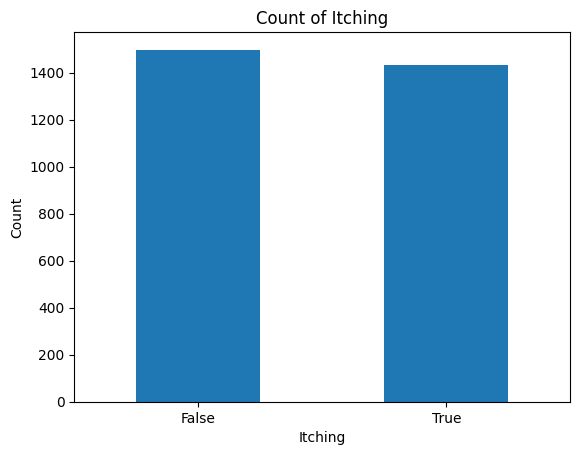

In [242]:
# Plot count of Itching
data_ver4['Itching'].value_counts().plot(kind='bar')
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()




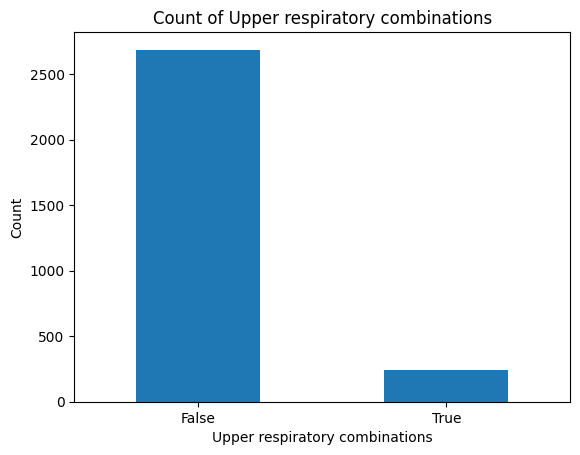

In [243]:
# Plot the count of occurrences for each drug class
# Plot count of Upper respiratory combinations
data_ver4['Upper respiratory combinations'].value_counts().plot(kind='bar')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

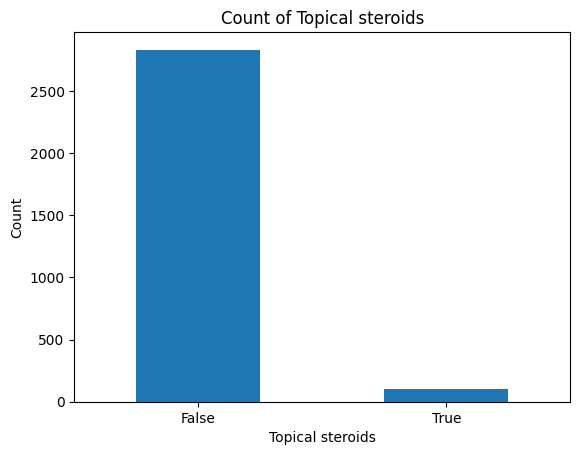

In [244]:
# Plot count of Topical steroids
data_ver4['Topical steroids'].value_counts().plot(kind='bar')
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Bar Plot – Count of Specific Drug Classes

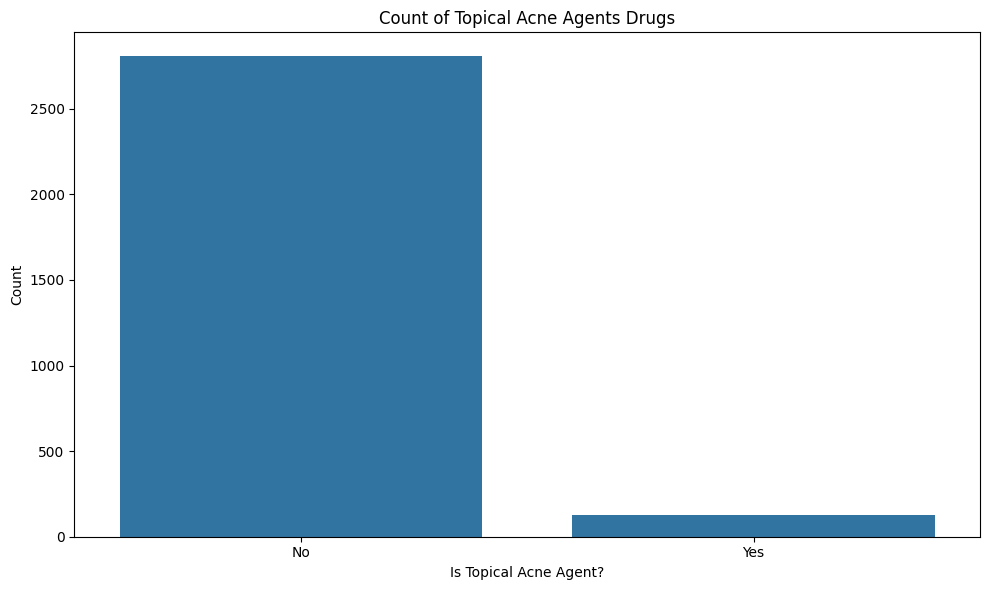

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data_ver4, x='Topical acne agents')
plt.title('Count of Topical Acne Agents Drugs')
plt.xlabel('Is Topical Acne Agent?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


# Bar Plot – Top 10 Most Common Drug Classes

C:\Users\deemi\AppData\Local\Temp\ipykernel_18968\3518506344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.values, y=top_classes.index, palette='viridis')


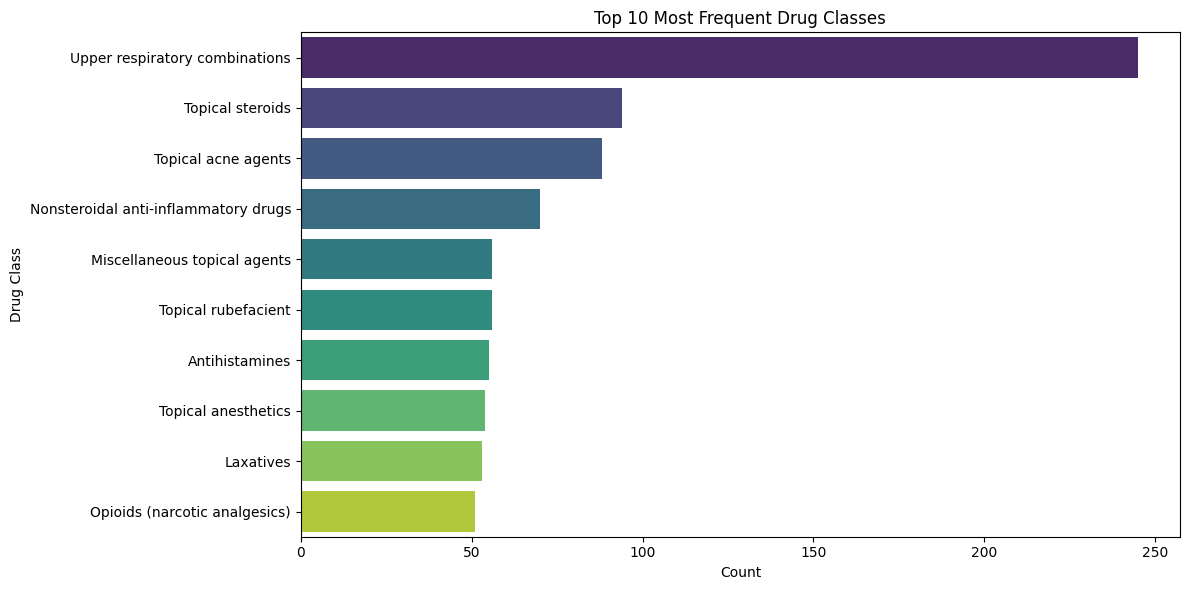

In [246]:
top_classes = data_ver4['drug_classes'].value_counts().dropna().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_classes.values, y=top_classes.index, palette='viridis')
plt.title('Top 10 Most Frequent Drug Classes')
plt.xlabel('Count')
plt.ylabel('Drug Class')
plt.tight_layout()
plt.show()


# Heatmap – Side Effects vs Drug Classes

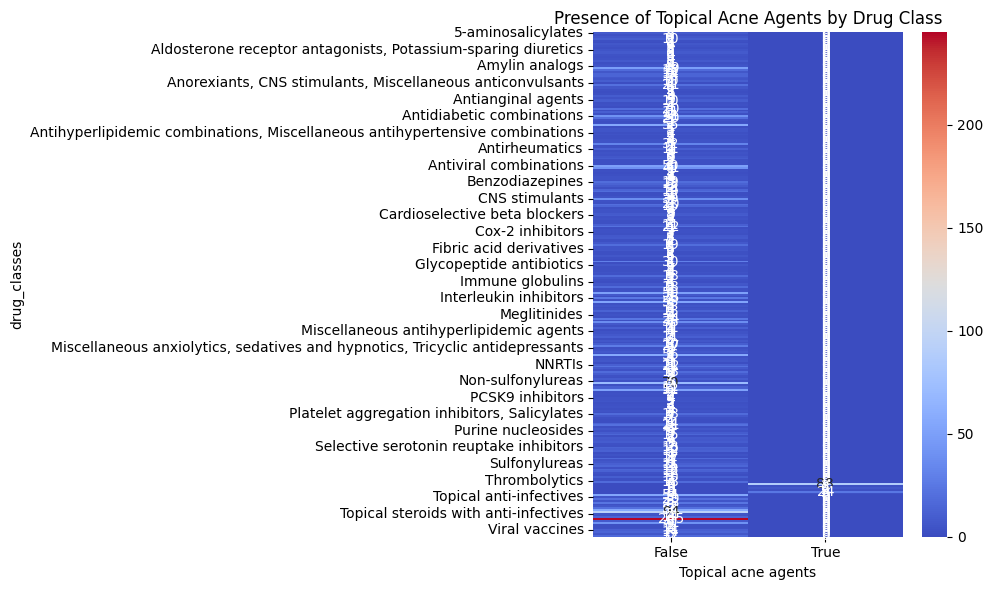

In [247]:
pivot_df = pd.crosstab(data_ver4['drug_classes'], data_ver4['Topical acne agents'])
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='coolwarm')
plt.title('Presence of Topical Acne Agents by Drug Class')
plt.tight_layout()
plt.show()


# Pie Chart – Distribution of Topical Acne Agents

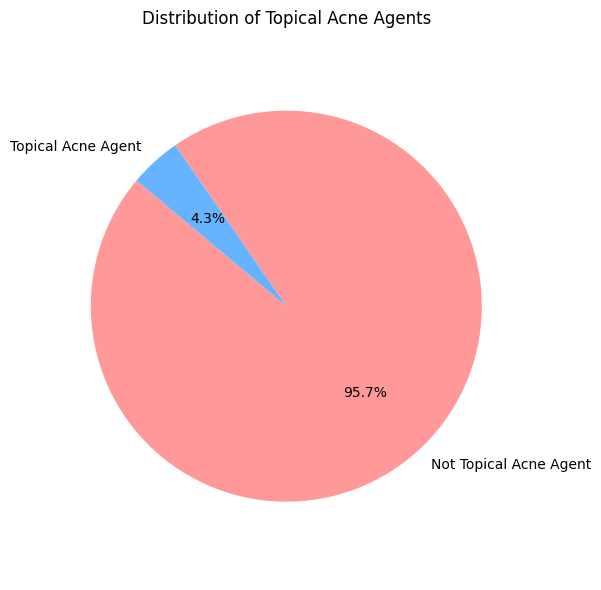

In [248]:
labels = ['Not Topical Acne Agent', 'Topical Acne Agent']
counts = data_ver4['Topical acne agents'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Topical Acne Agents')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Compare Side Effects Between Drug Classes (Stacked Plot)

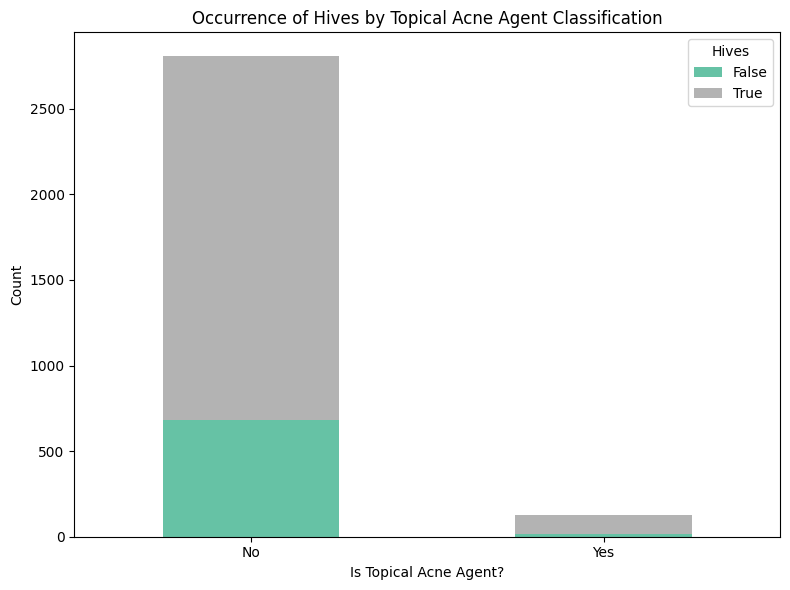

In [249]:
grouped = data_ver4.groupby('Topical acne agents')['Hives'].value_counts().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Occurrence of Hives by Topical Acne Agent Classification')
plt.xlabel('Is Topical Acne Agent?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title='Hives')
plt.tight_layout()
plt.show()


# Side Effects Frequency Plot

C:\Users\deemi\AppData\Local\Temp\ipykernel_18968\3730197067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_effects.values, y=top_effects.index, palette='rocket')
C:\Users\deemi\AppData\Local\Temp\ipykernel_18968\3730197067.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


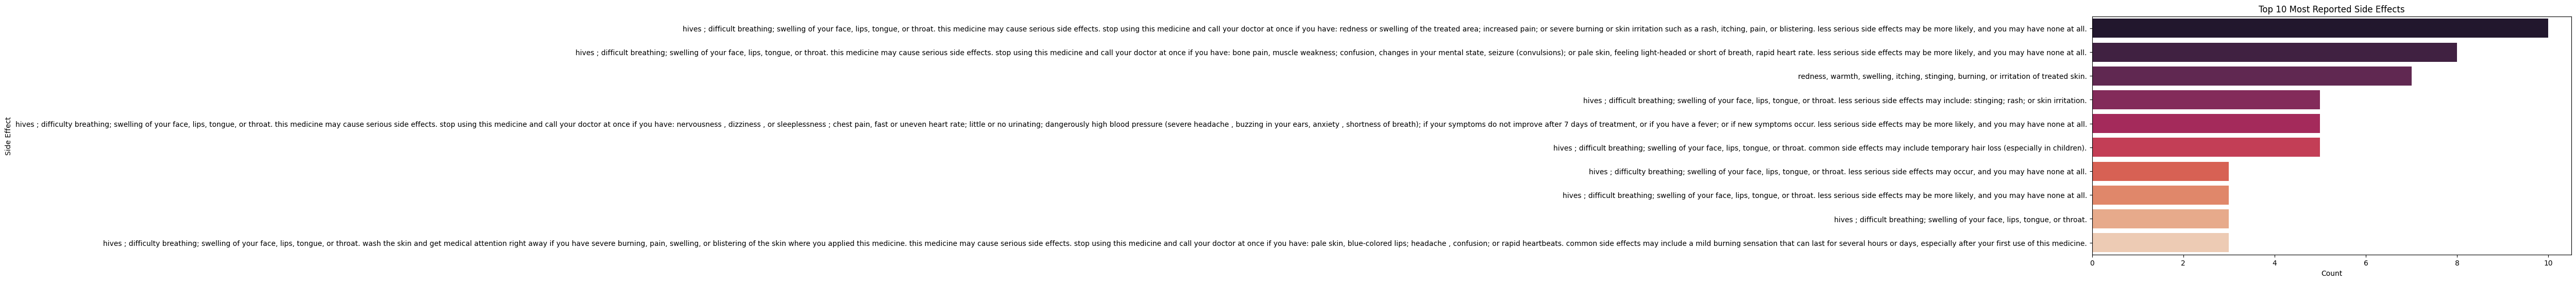

In [252]:
top_effects = data_ver4['side_effects'].dropna().str.lower().value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_effects.values, y=top_effects.index, palette='rocket')
plt.title('Top 10 Most Reported Side Effects')
plt.xlabel('Count')
plt.ylabel('Side Effect')
plt.tight_layout()
plt.show()


# Boxplot – Ratings Distribution by Drug Class

C:\Users\deemi\AppData\Local\Temp\ipykernel_18968\2863337636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_ver4, x='Topical acne agents', y='rating', palette='Set3')


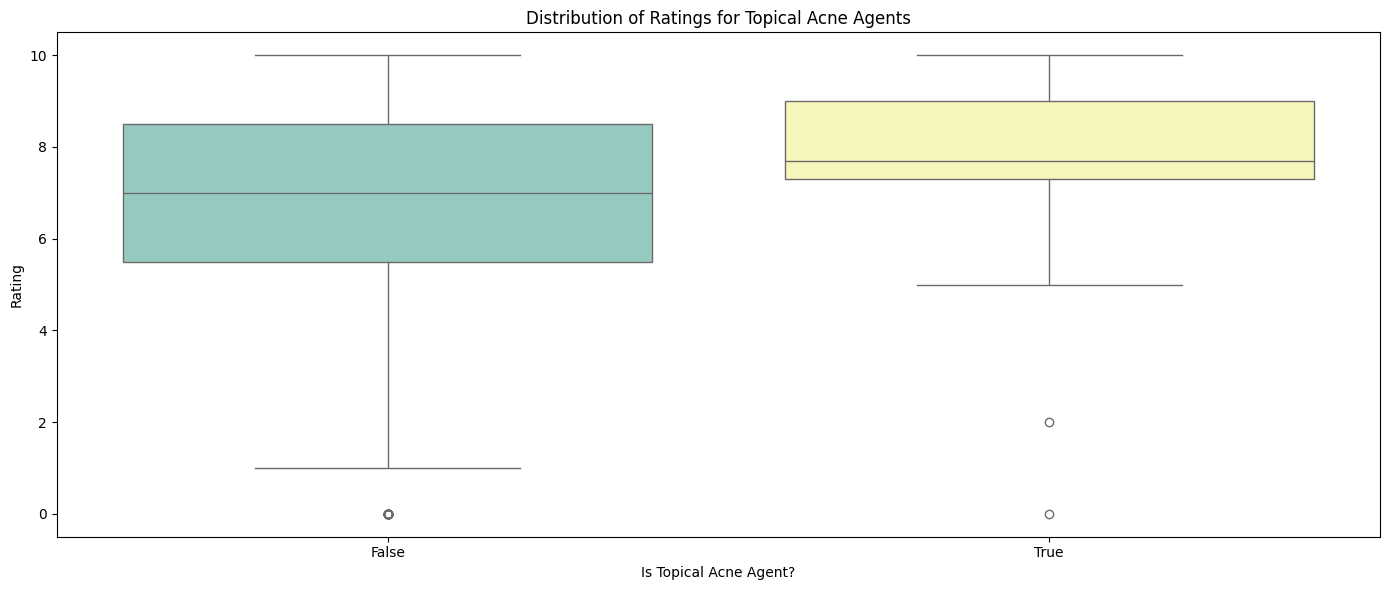

In [257]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_ver4, x='Topical acne agents', y='rating', palette='Set3')
plt.title('Distribution of Ratings for Topical Acne Agents')
plt.xlabel('Is Topical Acne Agent?')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


# Heatmap of Binary Side Effects

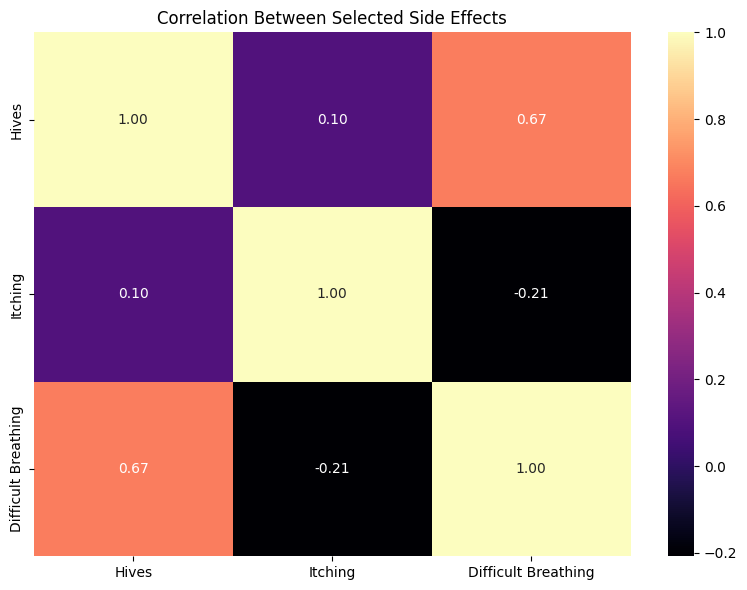

In [260]:
side_effect_cols = ['Hives', 'Itching', 'Difficult Breathing']
plt.figure(figsize=(8, 6))
sns.heatmap(data_ver4[side_effect_cols].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Between Selected Side Effects')
plt.tight_layout()
plt.show()


# Treemap of Drug Class Proportions

In [263]:
!pip install squarify


c:\Users\deemi\AppData\Local\Programs\Python\Python313\Lib\site-packages\squarify\__init__.py:231: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap()


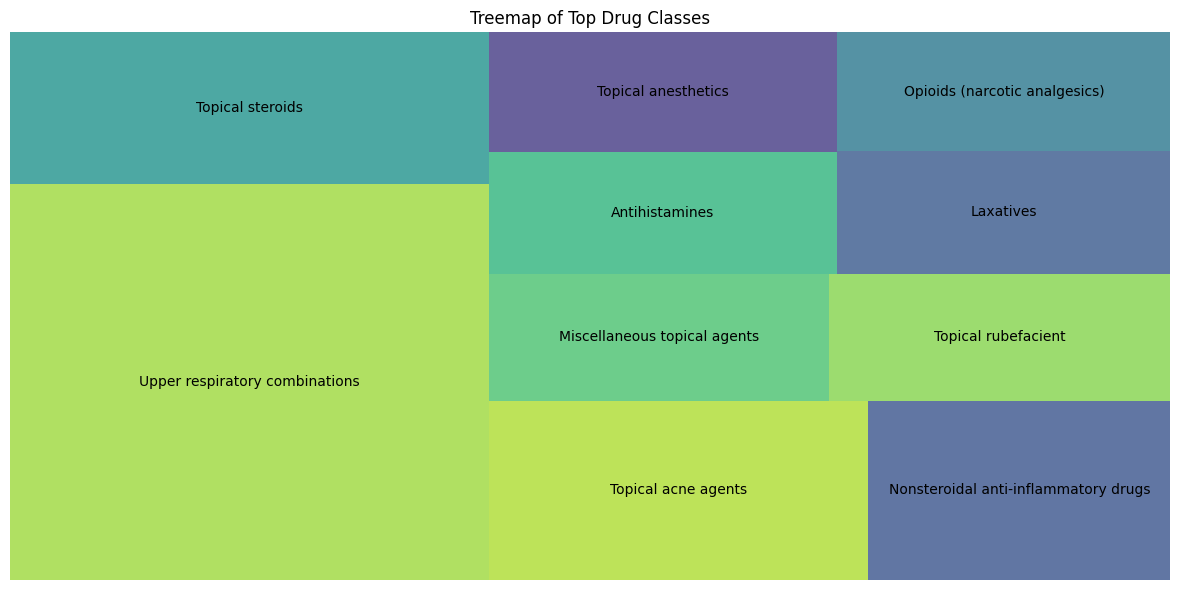

In [264]:
import squarify

drug_counts = data_ver4['drug_classes'].value_counts().dropna().head(10)

plt.figure(figsize=(12, 6))
squarify.plot(sizes=drug_counts.values, label=drug_counts.index, alpha=.8)
plt.title('Treemap of Top Drug Classes')
plt.axis('off')
plt.tight_layout()
plt.show()


Thank You

# Deepak Mishra